In [ ]:
from pandas import read_csv, Series, DataFrame
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

Importamos los datos de una base de datos que contiene características de alimentos

In [ ]:
food = read_csv("https://userpage.fu-berlin.de/soga/300/30100_data_sets/food-texture.csv", index_col=0)
food.head()

,Oil,Density,Crispy,Fracture,Hardness
B110,16.5,2955,10,23,97
B136,17.7,2660,14,9,139
B171,16.2,2870,12,17,143
B192,16.7,2920,10,31,95
B225,16.3,2975,11,26,143



El conjunto de datos consta de 50 filas (observaciones) y 5 columnas (características/variables). Las características son:

Aceite: porcentaje de aceite en la masa

Densidad: la densidad del producto (cuanto mayor sea el número, más denso será el producto)

Crujiente: una medida de la crujencia, en una escala de 7 a 15, siendo 15 más crujiente.

Fractura: el ángulo, en grados, a través del cual se puede doblar lentamente la masa antes de que se fracture.

Dureza: se utiliza un punto afilado para medir la cantidad de fuerza requerida antes de que ocurra la ruptura.

La clase FactorAnalysis del paquete scikit-learn permite realizar análisis factorial. Al instanciar la clase, podemos pasarle el número deseado de factores.

FactorAnalysis(n_components = <factors>)

Ustedes pueden reemplazar <factors> con la cantidad de factores deseada :)

Con esta clase, podemos realizar un análisis factorial de máxima verosimilitud en una matriz de covarianza o matriz de datos, especificando el número deseado de factores. Con el argumento adicional de rotación, se puede especificar la transformación de los factores como varimax o quartimax, dos tipos de rotación ortogonal, o None (predeterminado) para no rotación.

Obtener un valor razonable para la cantidad de factores deseada es un aspecto difícil del análisis factorial. Si ya tenemos cierto entendimiento del sistema que creó nuestros datos, podemos hacer una suposición educada sobre el número de variables latentes.

Si no sabemos mucho acerca de nuestros datos aparte de que el número de variables no es demasiado grande, simplemente podemos probar varios valores para inicializar el modelo. Sin embargo, generalmente se recomienda utilizar un enfoque más sofisticado y realizar un análisis de componentes principales (PCA) para obtener una buena estimación inicial del número de factores.

Dado que ya hemos explicado el PCA, no lo repetiremos aquí y simplemente haremos una suposición y estableceremos el número de factores en 2. Además, probaremos el análisis con la rotación establecida en varimax y con el valor predeterminado rotation = None.

Calcularemos esto y lo representaremos gráficamente usando matplotlib.


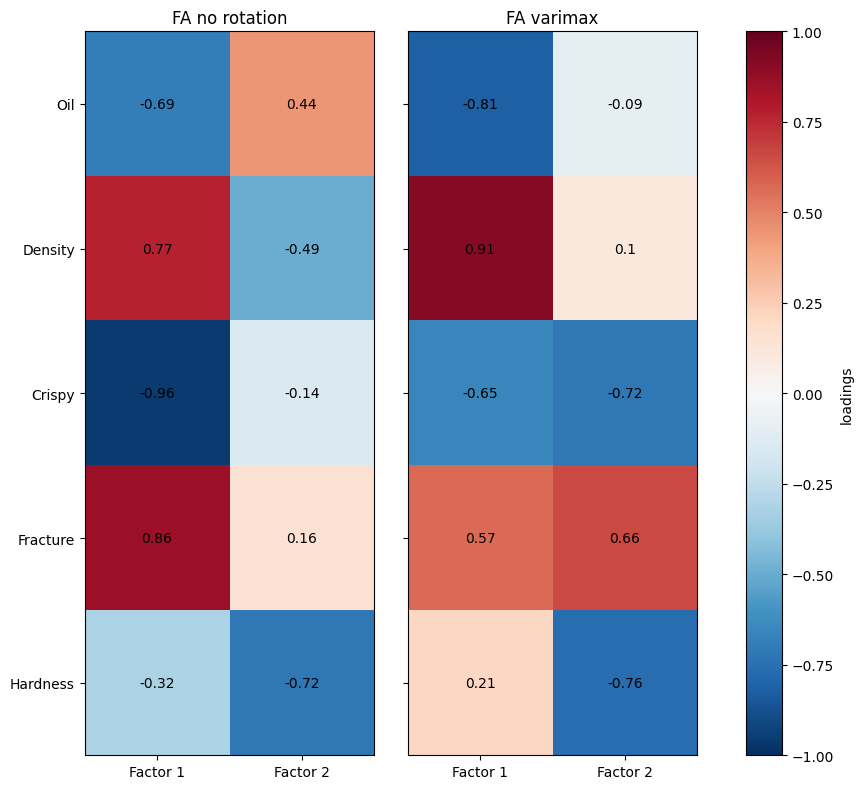

In [ ]:
# estandardizar los datos
X = StandardScaler().fit_transform(food)

# Definir el número de factores
factors = 2

# Definir una lista de 2 tuplas que contienen títulos y las instancias del método FactorAnalysis
#la función es factor analisis
#rotación varimax, es ortogonal, para maximizar la carga de los logits, maximiza la varianza
#el que mas se parece al pca
#hay otra llamada rotamax y otra oblicua que son transformaciones lineales

fas = [
    ("FA no rotation", FactorAnalysis(n_components=factors)),  # Factor Analysis sin rotación
    ("FA varimax", FactorAnalysis(n_components=factors, rotation="varimax")),  # Factor Analysis con rotación varimax
]

# Preparar la figura y los ejes para los gráficos
fig, axes = plt.subplots(ncols=len(fas), figsize=(10, 8))

# Iterar sobre las variantes de análisis fas, emparejadas con los ejes de los gráficos
for ax, (title, fa) in zip(axes, fas):
    # Ajustar el modelo a los datos estandarizados
    fa = fa.fit(X)
    # Transponer la matriz de componentes (loadings)
    factor_matrix = fa.components_.T
    # Graficar los datos como un mapa de calor
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmax=1, vmin=-1)
    # Agregar el valor correspondiente al centro de cada celda
    for (i,j), z in np.ndenumerate(factor_matrix):
        ax.text(j, i, str(z.round(2)), ha="center", va="center")
    # Configurar metadatos del gráfico
    ax.set_yticks(np.arange(len(food.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(food.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(title)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Factor 1", "Factor 2"])
    # Ajustar los ejes para ahorrar espacio
    plt.tight_layout()

# Agregar una barra de color
cb = fig.colorbar(im, ax=axes, location='right', label="loadings")
# Mostrar el gráfico
plt.show()


Antes de interpretar los resultados del análisis factorial, recordemos la idea básica detrás de él. El análisis factorial crea combinaciones lineales de factores para abstraer la comunidad subyacente de la variable. Esto reduce la cantidad de factores en el conjunto de datos, preservando la mayor parte de la varianza.

Esto nos permite agregar un gran número de variables observables en un modelo para representar un concepto subyacente, facilitando la comprensión de los datos.

La variabilidad en un conjunto de datos
X
X está dada por
Σ
Σ, y su estimación
Σ
^
Σ
^
  está compuesta por la variabilidad explicada por una combinación lineal de los factores, que llamamos comunidad, y la variabilidad restante que no puede ser explicada por una combinación lineal de los factores, es decir, la singularidad.

Σ
^
=
Λ
^
Λ
^
T
 (comunidad)
+
Ψ
^
 (singularidad)
Σ
^
 =
Λ
^
  
Λ
^
  
T
  (comunidad) +
Ψ
^
  (singularidad)

Ahora veamos nuestros resultados:

En el gráfico anterior podemos ver las cargas, que van de -1 a 1. Esta parte está representada por
Λ
^
Λ
^
  en la ecuación anterior. Las cargas son la contribución de cada variable original al factor. Las variables con valores de carga más alejados de 0 tienen una parte mayor de su variabilidad factor.

Ahora vamos a verificar la singularidad de cada variable. Nota que solo usaremos el método de rotación varimax en adelante.

El siguiente gráfico se genera directamente desde un Pandas Series, utilizando el método .plot(). Esto proporciona un acceso fácil a gráficos rápidos.


<Axes: ylabel='Uniqueness'>

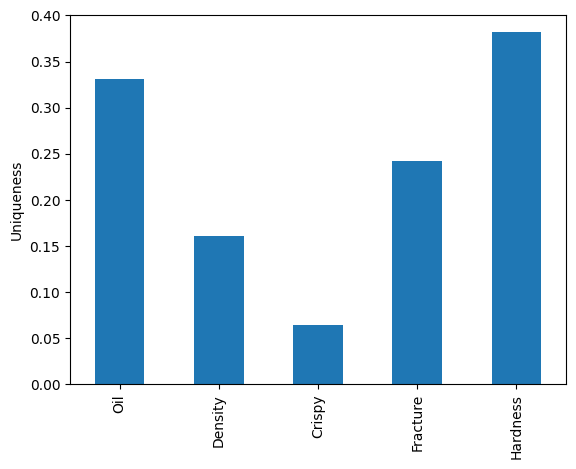

In [ ]:
# Crear una instancia de Factor Analysis con 2 componentes y rotación varimax
fa = FactorAnalysis(n_components=2, rotation="varimax")

# Ajustar el modelo Factor Analysis a los datos estandarizados
fa.fit(X)

# Calcular la varianza del ruido (uniqueness) para cada variable y crear una serie con los resultados
uniqueness = Series(fa.noise_variance_, index=food.columns)

# Graficar la varianza del ruido (uniqueness) como un gráfico de barras
uniqueness.plot(
    kind="bar",  # Tipo de gráfico: barras
    ylabel="Uniqueness"  # Etiqueta del eje y
)



La singularidad, que varía de 0 a 1, a veces también se denomina (ruido) blanco, corresponde a la proporción de variabilidad que no puede ser explicada por una combinación lineal de los factores. Esta parte está representada por
Ψ
^
Ψ
^
  en la ecuación anterior. Una alta singularidad para una variable indica que los factores no explican bien su varianza.

En oposición a la singularidad, está la comunidad:

<Axes: ylabel='communality'>

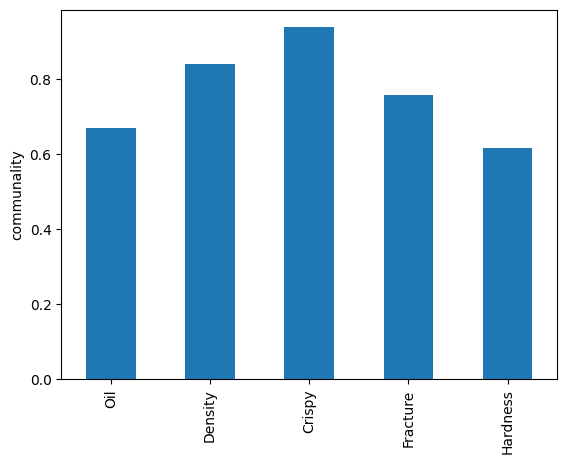

In [ ]:
# Calcular el comunality para cada variable sumando los cuadrados de los loadings de cada factor
communality = Series(np.square(fa.components_.T).sum(axis=1), index=food.columns)

# Graficar el comunality como un gráfico de barras
communality.plot(
    kind="bar",  # Tipo de gráfico: barras
    ylabel="communality"  # Etiqueta del eje y
)


Al cuadrar la carga, podemos calcular la fracción de la varianza total de la variable explicada por los factores (Teetor, 2011). Esta proporción de la variabilidad se denota como comunidad.

Una forma de calcular la singularidad, cuando ya se ha calculado la comunidad, es restarla de 1. Un modelo de factor apropiado resulta en valores bajos para la singularidad y valores altos para la comunidad. Entonces, si observamos resultados deficientes para nuestro modelo, podríamos intentar con un número diferente de factores subyacentes (variables latentes).

<Axes: ylabel='uniqueness'>

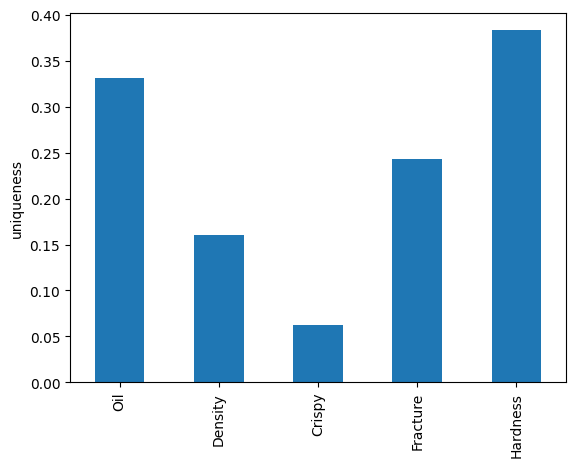

In [ ]:
# Calcular la unicidad (uniqueness) como complemento de 1 menos el comunality para cada variable
uniqueness = (1 - communality)

# Graficar la unicidad como un gráfico de barras
uniqueness.plot(
    kind="bar",  # Tipo de gráfico: barras
    ylabel="uniqueness"  # Etiqueta del eje y
)
#valores altos es un análisis apropiado

Recordemos el modelo de análisis factorial:

Σ
^
=
Λ
^
Λ
^
T
+
Ψ
^
Σ
^
 =
Λ
^
  
Λ
^
  
T
 +
Ψ
^


Usando nuestro modelo de factor fa, podemos calcular
Σ
^
Σ
^
  y compararlo con la matriz de correlación observada, S, mediante álgebra de matrices simple.

Usamos numpy para realizar operaciones matemáticas rápidas y eficientes. Nota: También podemos usar pandas, ya que "envuelve" a numpy, básicamente solo enviando nuestros comandos a la biblioteca.

In [ ]:
# Obtener los loadings de los factores del modelo Factor Analysis
lambda_ = fa.components_

# Calcular la matriz de varianza única (uniqueness) como una matriz diagonal
psi = np.diag(uniqueness)

# Calcular la matriz de correlación entre las variables originales estandarizadas
s = np.corrcoef(np.transpose(X))

# Calcular la matriz de covarianza teórica basada en el modelo de factores y la varianza única
sigma = np.matmul(lambda_.T, lambda_) + psi

# Calcular los residuos como la diferencia entre la matriz de correlación observada y la matriz de covarianza teórica
residuals = (s - sigma)



Restamos la matriz de correlación ajustada
Σ
^
Σ
^
  (sigma) de la matriz de correlación observada S. La matriz resultante se llama matriz residual. Los números cercanos a 0 indican que nuestro modelo factorial es una buena representación del sistema subyacente. Ahora vamos a graficar los resultados.

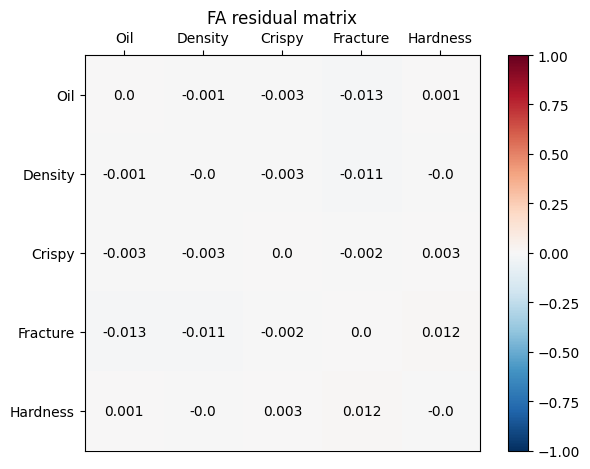

In [ ]:
# Crear un objeto de ejes de gráfico
ax = plt.axes()

# Visualizar los residuos como un mapa de calor
im = ax.imshow(residuals, cmap="RdBu_r", vmin=-1, vmax=1)

# Configurar los parámetros de las marcas (ticks) en el eje x
ax.tick_params(axis="x", bottom=False, labelbottom=False, top=True, labeltop=True)

# Configurar las marcas (ticks) y etiquetas en el eje x
ax.set_xticks(range(5))
ax.set_xticklabels(food.columns)

# Configurar las marcas (ticks) y etiquetas en el eje y
ax.set_yticks(range(5))
ax.set_yticklabels(food.columns)

# Agregar los valores de los residuos en cada celda del mapa de calor
for (i,j), z in np.ndenumerate(residuals):
    ax.text(j, i, str(z.round(3)), ha="center", va="center")

# Agregar una barra de color para representar los valores
fig.colorbar(im, ax=ax, location='right')

# Establecer el título del gráfico
ax.set_title("FA residual matrix")

# Ajustar el diseño del gráfico para que se ajuste correctamente
plt.tight_layout()



El propósito de una rotación es producir cargas más extremas. La idea detrás de esto es dar significado a los factores. Esto puede ayudar con su interpretación. Desde un punto de vista matemático, no hay diferencia entre una matriz rotada y una no rotada. El modelo ajustado es el mismo, las singularidades son las mismas y la proporción de varianza explicada es la misma.

Aquí ajustamos tres modelos de factores, uno sin rotación, uno con rotación varimax y uno con rotación quartimax. Luego hacemos un gráfico de dispersión de las primeras y segundas cargas.

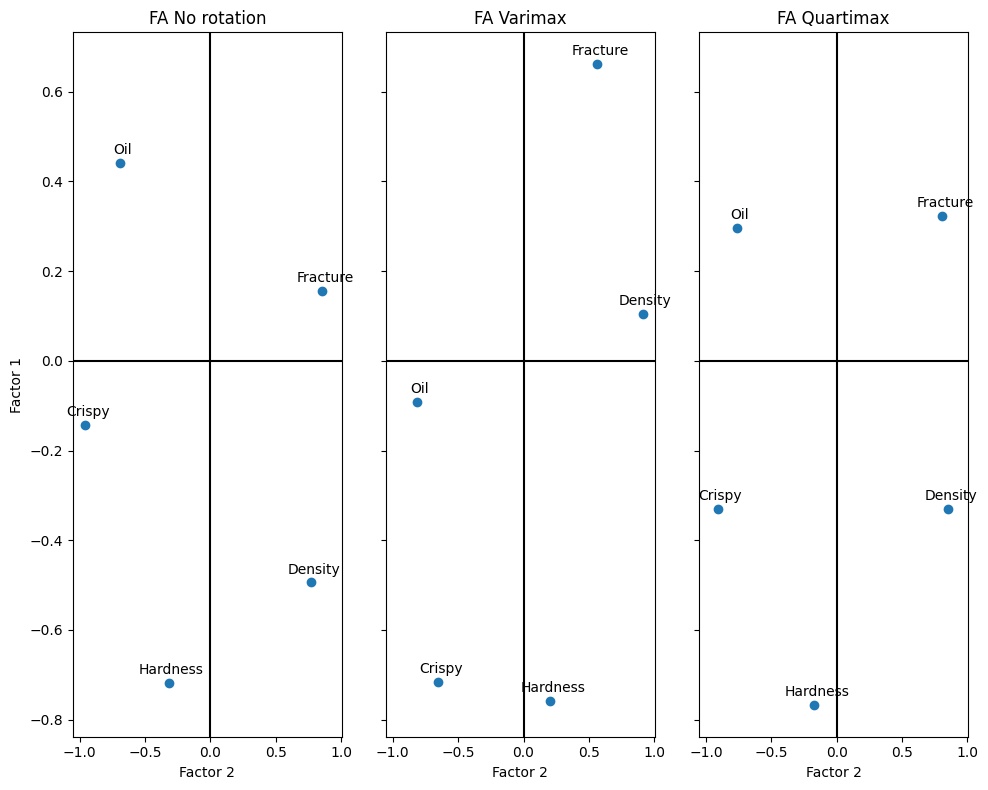

In [ ]:
# Definir los métodos de análisis de factores con diferentes rotaciones
methods = [
    ("FA No rotation", FactorAnalysis(2,)),  # Factor Analysis sin rotación
    ("FA Varimax", FactorAnalysis(2, rotation="varimax")),  # Factor Analysis con rotación varimax
    ("FA Quartimax", FactorAnalysis(2, rotation="quartimax")),  # Factor Analysis con rotación quartimax
]

# Crear una figura y ejes para los gráficos
fig, axes = plt.subplots(ncols=3, figsize=(10, 8), sharex=True, sharey=True)

# Iterar sobre los métodos y los ejes para los gráficos
for ax, (method, fa) in zip(axes, methods):
    # Ajustar el modelo de Factor Analysis al conjunto de datos
    fa = fa.fit(X)

    # Obtener los componentes (loadings) del Factor Analysis
    components = fa.components_

    # Calcular el valor máximo para establecer límites en los ejes
    vmax = np.abs(components).max()

    # Graficar los componentes en un gráfico de dispersión
    ax.scatter(components[0,:], components[1, :])

    # Agregar líneas de referencia en los ejes x e y
    ax.axhline(0, -1, 1, color='k')
    ax.axvline(0, -1, 1, color='k')

    # Agregar etiquetas para las variables en el gráfico
    for i, j, z in zip(components[0, :], components[1, :], food.columns):
        ax.text(i + .02, j + .02, str(z), ha="center")

    # Establecer el título del gráfico
    ax.set_title(str(method))

    # Configurar etiquetas en el eje y solo en la primera columna de subgráficos
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel("Factor 1")

    # Configurar etiquetas en el eje x
    ax.set_xlabel("Factor 2")

# Ajustar el diseño de los gráficos para que se ajusten correctamente
plt.tight_layout()

# Mostrar los gráficos
plt.show()


How can I interpret these factors? If two variables have loadings further away from 0 for the same factor, we know they are related. We want to understand the data in order to give meaningful names to the latent variables.

Taking a look at the plot in the middle FA Varimax above, it appears that Factor 1 describes a variable that makes pastry soft, less crisp. This description fits flaky pastry rather well.

Whereas the loadings in Factor 2 show high density and little oil. This would fit the classification of hot water crust pastry